In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder #convert target into numbers
from sklearn import metrics #performance of the model
import seaborn as sn
from sklearn.metrics import confusion_matrix  
import re        #regular expression  find replace etc word or letter in a string 
%matplotlib inline     
from sklearn import model_selection , preprocessing, naive_bayes, metrics  #naive bayes 
from sklearn.feature_extraction.text import TfidfVectorizer
#converts target data into numbers remover strings in numbers 
#term frequency  cretes vrctor of word assigned as a number to its frequency.

In [2]:
df_inputdata=pd.read_csv('D:\spamham.csv' ,usecols =[0,1],encoding='latin-1') #usecols select only required coloumns by index 

In [3]:
df_inputdata.head() #an api that displyas top 5 records by default 
                    #2 class under v1 ham and spam so called binary class classification 

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df_inputdata.rename(columns={'v1':'category' ,'v2':'message'}, inplace=True) #rename #set values or commit. 

In [5]:
df_inputdata.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df_inputdata.shape #pandas df  #row and coloumns

(5572, 2)

In [7]:
df_inputdata.count()

category    5572
message     5572
dtype: int64

In [8]:
df_inputdata.groupby('category').describe()

message                                                            \
           count unique                                                top   
category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    653  Please call our customer service representativ...   

               
         freq  
category       
ham        30  
spam        4

In [9]:
df_inputdata.groupby('category').count()

,message
category,
ham,4825
spam,747


In [10]:
#exploratory data analysis 

category_count= pd.DataFrame()
category_count['count'] = df_inputdata['category'].value_counts()

In [11]:
category_count['count']

ham     4825
spam     747
Name: count, dtype: int64

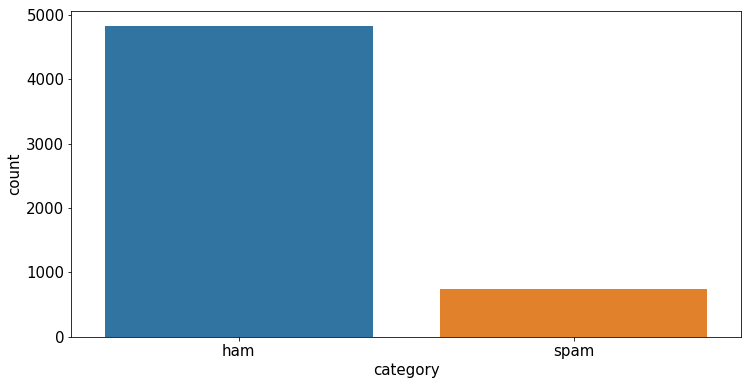

In [12]:
#draw graph
fig,ax = plt.subplots(figsize=(12,6))
sn.barplot(x=category_count.index, y= category_count['count'] ,ax=ax)
ax.set_ylabel('count',fontsize=15)
ax.set_xlabel('category',fontsize=15)
ax.tick_params(labelsize=15)

In [13]:
#looking at the  number at ham and spams  ham is greater than spam 
#the output should yield either almost equal distribution or no difference at all 
#this gives better accuracy in the ml model





#preprocessing tweets for removin punctuations(],]./) ,@,#,$,%,& special characters
def preprocessMessage(tweet):
    from string import punctuation
    tweet= re.sub(r'\&\w*;' , '',tweet)
    tweet=re.sub('@[^\s]+' , '' ,tweet)
    tweet=re.sub(r'\$\w*' ,'',tweet)
    tweet=tweet.lower()
    tweet=re.sub(r'https?:\/\/.*\/\w*' ,'' ,tweet)
    tweet=re.sub(r'['+ punctuation.replace('@','')+ ']+' , '', tweet)
    tweet=re.sub(r'\b\w{1,2}\b' , '',tweet)
    tweet=re.sub(r'\s\s+','',tweet)
    tweet=tweet.lstrip('')
    tweet=''.join(c for c in tweet if c <= '\uFFFF')
    return tweet             
                 

In [14]:
df_inputdata['message'] =df_inputdata['message'].apply(preprocessMessage)

In [15]:
df_inputdata['message'].head()

0     until jurong point crazy available onlybugisg...
1                                    lar joking wifoni
2    free entrywkly compwincup final tkts 21st may ...
3                     dun sayearly horalready then say
4         nahdont thinkgoesusflives around here though
Name: message, dtype: object

In [16]:
df_inputdata['category'].value_counts()

ham     4825
spam     747
Name: category, dtype: int64

In [17]:
#covert labels from texts to numbers

label_Encoder =preprocessing.LabelEncoder()


In [18]:
df_inputdata['category']=label_Encoder.fit_transform(df_inputdata['category'])

In [19]:
X= df_inputdata.message
y= df_inputdata.category

In [20]:
#split the dataset into 80% and 20% for training and testing respctively

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20) #percent of test data

In [21]:
#convert the raw document into TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect= TfidfVectorizer(analyzer='word' , token_pattern=r' \w{1,}', max_features=20000)



In [22]:
#create TF-IDF with X_train  #fit is training features  #term frequency - inverse document frequency (TF-IDF)
tfidf_vect.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=' \\w{1,}', tokenizer=None, use_idf=True,
        vocabulary=None)

In [23]:
#use TF-IDF created with X_train for transforming X_train and X_test 

xtrain_tfidf = tfidf_vect.transform(X_train)
xvalid_tfidf = tfidf_vect.transform(X_test)

In [24]:
#create a naive bayes model

model=naive_bayes.MultinomialNB()

In [25]:
#train the model with X_train and y_train
model.fit(xtrain_tfidf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
#get the prediction for X_test which is transformed with TF-IDF

y_pred=model.predict(xvalid_tfidf)

In [27]:
#get accuracy for the model
metrics.accuracy_score(y_test,y_pred)

0.947085201793722

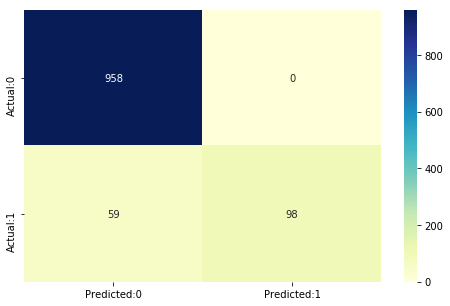

In [28]:
#get the confusion matrix 
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize =(8,5))
sn.heatmap(conf_matrix, annot=True ,fmt='d', cmap="YlGnBu")

In [29]:
#true positive        #false negative

#false positive        #true negative         #conside 0 as positive 1 as negative class 

In [30]:
#ham
#myData=np.array(["i know you are thining about malaria. But relax"])
#spam
myData=np.array(['i heard you got a new mobile phone? is it the latest realme smartphone.?!'])

In [31]:
my_data=tfidf_vect.transform(myData)

In [32]:
y_res=model.predict(my_data)

In [33]:
y_res[0]

0

In [34]:
vals=label_Encoder.inverse_transform([y_res[0]]) #to convert the number back into string


C:\Users\Jayant\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [35]:
vals[0]  #value of 0 is ham ,it is displayed in string format now

'ham'

In [36]:
#multiple records

#spam,ham
mymultiplesdata=['###%^& urgent your bank account has been credited by $100000 sing up on link to claim now!!@$%*(.','yeah he acted totally non chalant his attitude totally infuriates me']

In [37]:
df_mymultiplesdata=pd.DataFrame(mymultiplesdata,columns={'Message'})

In [38]:
df_mymultiplesdata['Message']=df_mymultiplesdata['Message'].apply(preprocessMessage)

In [39]:
mytransdata=tfidf_vect.transform(df_mymultiplesdata['Message'])

In [40]:
y_predLables=model.predict(mytransdata)

In [41]:
y_predLables.shape

(2,)

In [42]:
#y_prediLables=y_predLables.reshape(-1)

In [43]:
vals=label_Encoder.inverse_transform(y_predLables)

C:\Users\Jayant\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [44]:
for val in vals:
    print(val)

ham
ham


In [45]:
from sklearn.metrics import  classification_report 

In [48]:
report =classification_report(y_test, y_pred, labels=[0,1])

In [49]:
print(report)


             precision    recall  f1-score   support

          0       0.94      1.00      0.97       958
          1       1.00      0.62      0.77       157

avg / total       0.95      0.95      0.94      1115



In [50]:
#recall=TP/(TP+FN)
#PRECISION=TP/(TP+FP)
#f1-score=2*(precision*recall)/(precision+recall)

In [51]:
TP=cm[0,0]
FN=cm[0,1]
FP=cm[1,0]
TN=cm[1,1]

In [52]:
recall = TP/(TP+FN)

In [53]:
recall

1.0

In [69]:
precision=TP/(TP+FP)

precision

In [56]:
f1score=2*(precision*recall)/(precision+recall)

In [70]:
precision

0.9419862340216323

In [57]:
f1score

0.970126582278481

In [66]:
#good f1 scores means low false positives and negatives

#precisiion - precision is the ratio of correcctly predicted positive
#observations to the total predicted positive observaations.

#recall (sensitivity) -Recall is the ratio of correctly predicted positive observation to all the observations in the actual class

#F1 score - F1 score is the weighted average of precision and recall

In [68]:
#print('HAPPY MACHINE LEARNING ')

###### HAPPY MACHINE LEARNING

In [ ]:
#Tkinter python library to crete GUI for windows based apps

#flask and django for web based apps